<center><font color="b" size="40">PUBG GAMING PREDICTION</font></center>

<center><img src="https://media.giphy.com/media/vVwv7I87uB9gZ7avim/giphy.gif" width=600 height=600></center>

In [1]:
#importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import catboost as cb
from sklearn.metrics import r2_score

In [3]:
#importing dataset
data=pd.read_csv("PUBG_Game_Prediction_data.csv")

In [4]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# DATA WRANGLING


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
# getting index of null data
data[data["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
#drop null data row
data.drop(2744604,axis=0,inplace=True)

In [15]:
data["Playersjoined"]=data.groupby("matchId")["matchId"].transform("count")
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,94
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,93
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,98
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,94


<Axes: xlabel='Playersjoined', ylabel='count'>

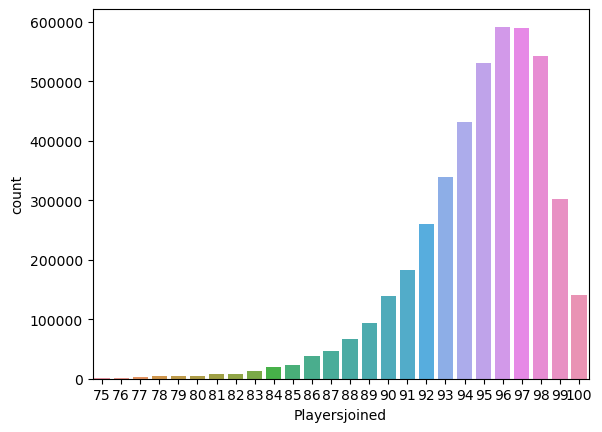

In [23]:
sns.countplot(data[data["Playersjoined"]>=75],x="Playersjoined")

In [26]:
len(data[data["Playersjoined"]>=75])

4389644

In [27]:
# most of times games have 75+ players 
# mostly 90+ players join lobby

# DATA ANALYSIS

In [28]:
# checking for hackers

In [30]:
# 1) when player doesnt move at all but do other stuff like kill,weapon changes etc

<center><img src="https://media.giphy.com/media/xd2c44rUajkHnxpywZ/giphy.gif" width=500></center>

In [32]:
data["Total Distance"]=data["rideDistance"]+data["swimDistance"]+data["walkDistance"]
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,Total Distance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.000,0,0,244.80,1,1466,0.4444,96,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.000,0,0,161.80,2,0,0.7755,98,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.000,0,0,202.70,3,0,0.1667,91,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.000,0,0,49.75,2,0,0.1875,97,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.000,0,0,81.70,6,0,0.2935,93,81.7000
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,2.184,0,0,788.70,4,0,0.4815,98,790.8840
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000


In [33]:
len(data[data["Total Distance"]==0])

97369

In [51]:
drop1=data[(data["Total Distance"]==0) & (data["kills"]>1)].index
drop1

Index([   1824,    6673,   11892,   20881,   23298,   24640,   25659,   32930,
         33256,   34866,
       ...
       4418082, 4418548, 4420651, 4423018, 4426500, 4429697, 4436511, 4437516,
       4440927, 4441511],
      dtype='int64', length=1104)

In [57]:
# its highly unlikely to kill more than 1 player without moving probably Hacking
data.drop(drop1,axis=0,inplace=True)

In [60]:
# 2) 30+ kills is also most probably hacking

<center><img src="https://media.giphy.com/media/VwGyNp25HzBgFFmviV/giphy.gif" width=650 ></center>

C:\Users\Asus\AppData\Local\Temp\ipykernel_772\3322735957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["kills"])


<Axes: xlabel='kills', ylabel='Density'>

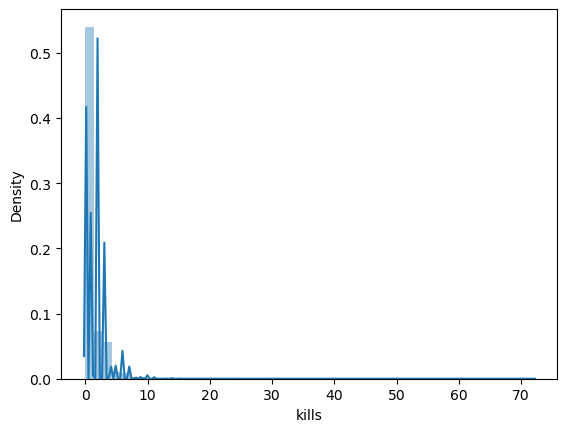

In [63]:
sns.distplot(data["kills"])

In [68]:
len(data[data["kills"]>30])

0

In [66]:
drop2=data[data["kills"]>30].index
drop2

Index([  57978,   87793,  156599,  160254,  180189,  334400,  353128,  457829,
        488335,  662650,  672993,  770454,  776524,  781794,  797111,  798939,
        829086,  840678,  859580,  877113,  894388,  917559,  917841, 1023010,
       1055609, 1166352, 1224312, 1248348, 1248675, 1283421, 1295313, 1377526,
       1378200, 1429536, 1454065, 1462706, 1480844, 1491277, 1547547, 1563461,
       1653639, 1736329, 1744705, 1764920, 1776623, 1961750, 1967215, 2004117,
       2020831, 2035747, 2040545, 2092693, 2105633, 2106125, 2126882, 2215801,
       2316123, 2340507, 2343424, 2373649, 2381682, 2403630, 2478385, 2487787,
       2492978, 2538633, 2575145, 2601666, 2681004, 2724641, 2803464, 2826077,
       2848123, 2861704, 2914453, 2929506, 2975329, 3128510, 3166397, 3206834,
       3258542, 3415833, 3431247, 3457052, 3673965, 3702869, 3730946, 3840888,
       3907422, 3924729, 4021018, 4127904, 4148675, 4235682, 4273754],
      dtype='int64')

In [67]:
data.drop(drop2,axis=0,inplace=True)

In [69]:
# 3) if person has roadkills more than 5 its highly unlikely so probably hacker

<center><img src="https://media.giphy.com/media/3o6fIVl3yU97yJnGCc/giphy.gif" width=600></center>

In [72]:
len(data[data["roadKills"]>=4])

154

In [73]:
drop3=data[data["roadKills"]>=5].index
drop3

Index([  24462,   39338,   72720,   90312,  197752,  209676,  213544,  217319,
        274649,  348353,  379141,  384553,  397973,  409898,  455691,  471329,
        474790,  481419,  592924,  676513,  745929,  864929,  870228, 1025255,
       1116346, 1234179, 1279773, 1313950, 1325583, 1367887, 1508495, 1535157,
       1577044, 1601661, 1681378, 1722390, 1815738, 1818097, 1856686, 1907619,
       1952636, 2067614, 2182177, 2301144, 2302574, 2302868, 2516621, 2534723,
       2674003, 2733926, 2767999, 2797814, 2826343, 2839316, 2845030, 2865804,
       2890740, 2898979, 3136462, 3143319, 3353490, 3486761, 3524413, 3534480,
       3565195, 3647940, 3702921, 3739211, 3897776, 3922415, 3954337, 3986150,
       4015466, 4051340, 4124070, 4194275, 4197304, 4297558, 4358475, 4367083,
       4392612, 4402493],
      dtype='int64')

In [74]:
data.drop(drop3,axis=0,inplace=True)

In [75]:
# 4) if someone changes weapon more than 20 times it highly unlikely he is real and not hacking

<center><img src="https://media.giphy.com/media/zaUTLcbjhWpTrNYoFG/giphy.gif"  width=700 height=340 ></center>

C:\Users\Asus\AppData\Local\Temp\ipykernel_772\4124674069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weaponsAcquired"])


<Axes: xlabel='weaponsAcquired', ylabel='Density'>

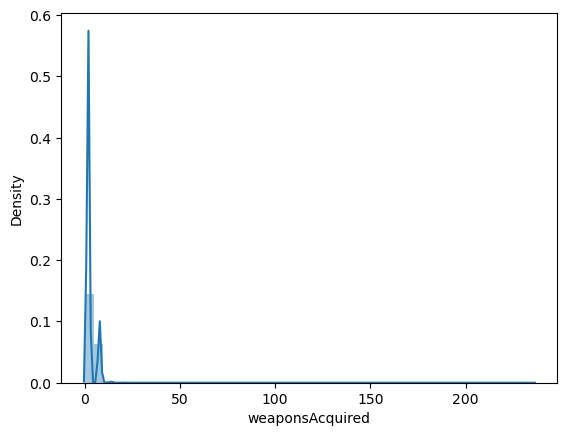

In [79]:
sns.distplot(data["weaponsAcquired"])

In [78]:
len(data[data["weaponsAcquired"]>=20])

3175

In [80]:
drop4=data[data["weaponsAcquired"]>=20].index
drop4

Index([   1292,    2769,    5629,   12199,   12730,   13418,   14404,   17509,
         18038,   18041,
       ...
       4431589, 4432354, 4433147, 4438414, 4438715, 4439894, 4440136, 4442804,
       4443350, 4446318],
      dtype='int64', length=3175)

In [81]:
data.drop(drop4,axis=0,inplace=True)

In [87]:
# 5) when someone does more than 3 kills and all headshot it signs hacking

<center><img src="https://media.giphy.com/media/xT0xeHi1rHNKi8j4Ck/giphy.gif" width="600" height="540" ></center>

In [83]:
data["headperkill"]=data["headshotKills"]/data["kills"]

In [86]:
data["headperkill"].fillna(0,inplace=True)
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,Total Distance,headperkill
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,96,244.8000,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,91,1445.0445,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,98,161.8000,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,91,202.7000,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,97,49.7500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,94,2311.0000,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,93,81.7000,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,98,790.8840,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,94,2748.0000,0.5


In [89]:
drop5=data[(data["kills"]>=3)&(data["headperkill"]==1)].index
drop5

Index([   2897,    3517,    3646,    3688,    4426,    4482,    6294,    6483,
          7171,    9231,
       ...
       4441084, 4442269, 4442570, 4443122, 4443376, 4443388, 4443806, 4444780,
       4446032, 4446277],
      dtype='int64', length=6048)

In [90]:
data.drop(drop5,axis=0,inplace=True)

In [91]:
data.shape

(4436461, 32)

### Feature Engineering

<center><img src="https://media.giphy.com/media/sFElc1ryNBsSpYVUwL/giphy.gif" width="500" ></center>

In [93]:
data.corr(numeric_only=True)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Playersjoined,Total Distance,headperkill
assists,1.000000,0.316344,0.388864,0.296602,0.185410,0.228796,-0.290767,0.040003,0.298115,0.239043,...,0.024513,0.003944,0.059554,0.298540,0.210940,0.023745,0.303814,-0.020365,0.240010,0.098944
boosts,0.316344,1.000000,0.536282,0.364927,0.343887,0.537204,-0.555722,0.008316,0.518548,0.407758,...,0.108133,0.013443,0.087482,0.640202,0.434084,-0.007592,0.634670,-0.015934,0.574363,0.182007
damageDealt,0.388864,0.536282,1.000000,0.747508,0.607719,0.345532,-0.686225,0.051255,0.884004,0.707817,...,0.038135,0.013075,0.083610,0.409583,0.323574,0.017389,0.447720,-0.025395,0.321718,0.299093
DBNOs,0.296602,0.364927,0.747508,1.000000,0.476569,0.267065,-0.560627,0.043229,0.721600,0.653019,...,0.017755,0.070011,0.061194,0.289308,0.215867,0.010939,0.282869,0.001280,0.228403,0.246643
headshotKills,0.185410,0.343887,0.607719,0.476569,1.000000,0.201364,-0.475297,0.024775,0.671040,0.513791,...,0.029342,0.006897,0.041006,0.257818,0.197185,0.004620,0.281450,-0.010068,0.193922,0.740669
heals,0.228796,0.537204,0.345532,0.267065,0.201364,1.000000,-0.386025,-0.002602,0.314468,0.270263,...,0.079917,0.035081,0.063156,0.431516,0.318836,-0.011175,0.428504,-0.015399,0.439735,0.120961
killPlace,-0.290767,-0.555722,-0.686225,-0.560627,-0.475297,-0.386025,1.000000,-0.023334,-0.743621,-0.811488,...,-0.089677,-0.037390,-0.073806,-0.591238,-0.508488,-0.002317,-0.719542,0.116603,-0.484098,-0.383996
killPoints,0.040003,0.008316,0.051255,0.043229,0.024775,-0.002602,-0.023334,1.000000,0.037482,0.037258,...,-0.004627,-0.039753,-0.009626,0.004540,-0.003686,0.983446,0.012928,0.051303,-0.017737,0.014707
kills,0.298115,0.518548,0.884004,0.721600,0.671040,0.314468,-0.743621,0.037482,1.000000,0.811847,...,0.040850,0.015205,0.082829,0.387707,0.302762,0.006358,0.428190,-0.010581,0.291997,0.325853
killStreaks,0.239043,0.407758,0.707817,0.653019,0.513791,0.270263,-0.811488,0.037258,0.811847,1.000000,...,0.034825,0.026676,0.064844,0.329495,0.274580,0.008296,0.377899,0.008315,0.246814,0.395504


In [ ]:
# Normalizing things which depend on number of Players in match and removing excess features

In [95]:
data["assist/revive"]=data["assists"]+data["revives"]
data["boosts/heals"]=data["boosts"]+data["heals"]

In [97]:
data["kill"]=data["kills"]/data["Playersjoined"]

In [101]:
data["DamageDealt"]=data["damageDealt"]/data["Playersjoined"]
data["killplace"]=data["killPlace"]/data["Playersjoined"]

In [103]:
data.drop(["assists","revives","boosts","heals","damageDealt","killPlace","kills","Playersjoined","swimDistance","walkDistance","rideDistance"],axis=1,inplace=True)

In [104]:
data

,Id,groupId,matchId,DBNOs,headshotKills,killPoints,killStreaks,longestKill,matchDuration,matchType,...,weaponsAcquired,winPoints,winPlacePerc,Total Distance,headperkill,assist/revive,boosts/heals,kill,DamageDealt,killplace
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,1241,0,0.00,1306,squad-fpp,...,1,1466,0.4444,244.8000,0.0,0,0,0.000000,0.000000,0.625000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,0,0.00,1777,squad-fpp,...,5,0,0.6400,1445.0445,0.0,0,0,0.000000,1.005165,0.626374
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,0,0,0.00,1318,duo,...,2,0,0.7755,161.8000,0.0,1,0,0.000000,0.693878,0.479592
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,0,0.00,1436,squad-fpp,...,3,0,0.1667,202.7000,0.0,0,0,0.000000,0.361538,0.824176
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,0,1,58.53,1424,solo-fpp,...,2,0,0.1875,49.7500,0.0,0,0,0.010309,1.030928,0.463918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,1029,0,0.00,1873,squad-fpp,...,3,1507,0.1786,2311.0000,0.0,0,0,0.000000,0.000000,0.787234
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,0,0,0,0.00,1435,solo,...,6,0,0.2935,81.7000,0.0,0,1,0.000000,0.474731,0.741935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,0,0,0.00,1321,squad-fpp,...,4,0,0.4815,790.8840,0.0,0,0,0.000000,0.602653,0.673469
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,1,1,0,1,98.50,1373,squad-fpp,...,8,0,0.8000,2748.0000,0.5,2,6,0.021277,1.919149,0.117021


In [107]:
from sklearn.preprocessing import LabelEncoder as LE
le=LE()
data["matchType"]=le.fit_transform(data["matchType"])

In [108]:
data

,Id,groupId,matchId,DBNOs,headshotKills,killPoints,killStreaks,longestKill,matchDuration,matchType,...,weaponsAcquired,winPoints,winPlacePerc,Total Distance,headperkill,assist/revive,boosts/heals,kill,DamageDealt,killplace
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,1241,0,0.00,1306,15,...,1,1466,0.4444,244.8000,0.0,0,0,0.000000,0.000000,0.625000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,0,0.00,1777,15,...,5,0,0.6400,1445.0445,0.0,0,0,0.000000,1.005165,0.626374
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,0,0,0.00,1318,2,...,2,0,0.7755,161.8000,0.0,1,0,0.000000,0.693878,0.479592
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,0,0.00,1436,15,...,3,0,0.1667,202.7000,0.0,0,0,0.000000,0.361538,0.824176
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,0,1,58.53,1424,13,...,2,0,0.1875,49.7500,0.0,0,0,0.010309,1.030928,0.463918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,1029,0,0.00,1873,15,...,3,1507,0.1786,2311.0000,0.0,0,0,0.000000,0.000000,0.787234
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,0,0,0,0.00,1435,12,...,6,0,0.2935,81.7000,0.0,0,1,0.000000,0.474731,0.741935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,0,0,0.00,1321,15,...,4,0,0.4815,790.8840,0.0,0,0,0.000000,0.602653,0.673469
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,1,1,0,1,98.50,1373,15,...,8,0,0.8000,2748.0000,0.5,2,6,0.021277,1.919149,0.117021


In [110]:
data.drop(["Id","groupId","matchId"],axis=1,inplace=True)

# Implementing model

<center><img src="https://media.giphy.com/media/Patt9S86dZ60VNLLbr/giphy.gif" width=600></center>

In [115]:
x=data.drop("winPlacePerc",axis=1)
y=data["winPlacePerc"]

In [112]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()

In [116]:
x_scaled=ss.fit_transform(x)

In [127]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x_scaled,y,test_size=0.3,random_state=0)

In [129]:
import catboost as cb

# Training the model

<center><img src="https://media.giphy.com/media/Li0OOdFFgAfECfuE9H/giphy.gif" width=300></center>

In [140]:
train_dataset=cb.Pool(x_train,y_train)

In [143]:
model=cb.CatBoostRegressor(loss_function="RMSE")

In [144]:
grid={"iterations":[100,150],
     "learning_rate":[0.03,0.1],
     "depth":[2,4,6,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5483255	test: 0.5480189	best: 0.5480189 (0)	total: 329ms	remaining: 32.6s
1:	learn: 0.5334469	test: 0.5331471	best: 0.5331471 (1)	total: 471ms	remaining: 23.1s
2:	learn: 0.5190073	test: 0.5187102	best: 0.5187102 (2)	total: 624ms	remaining: 20.2s
3:	learn: 0.5050627	test: 0.5047699	best: 0.5047699 (3)	total: 772ms	remaining: 18.5s
4:	learn: 0.4915792	test: 0.4912923	best: 0.4912923 (4)	total: 943ms	remaining: 17.9s
5:	learn: 0.4785017	test: 0.4782172	best: 0.4782172 (5)	total: 1.09s	remaining: 17.2s
6:	learn: 0.4658623	test: 0.4655804	best: 0.4655804 (6)	total: 1.25s	remaining: 16.5s
7:	learn: 0.4536412	test: 0.4533610	best: 0.4533610 (7)	total: 1.39s	remaining: 16s
8:	learn: 0.4417883	test: 0.4415110	best: 0.4415110 (8)	total: 1.54s	remaining: 15.5s
9:	learn: 0.4303445	test: 0.4300695	best: 0.4300695 (9)	total: 1.68s	remaining: 15.1s
10:	learn: 0.4192926	test: 0.4190221	best: 0.4190221 (10)	total: 1.83s	remaining: 14.8s
11:	learn: 0.4085422	test: 0.4082766	best: 0.4082766 (

95:	learn: 0.1365621	test: 0.1366599	best: 0.1366599 (95)	total: 13.8s	remaining: 574ms
96:	learn: 0.1361756	test: 0.1362762	best: 0.1362762 (96)	total: 13.9s	remaining: 431ms
97:	learn: 0.1358105	test: 0.1359139	best: 0.1359139 (97)	total: 14.1s	remaining: 288ms
98:	learn: 0.1354335	test: 0.1355383	best: 0.1355383 (98)	total: 14.2s	remaining: 144ms
99:	learn: 0.1350945	test: 0.1352002	best: 0.1352002 (99)	total: 14.4s	remaining: 0us

bestTest = 0.1352002382
bestIteration = 99

0:	loss: 0.1352002	best: 0.1352002 (0)	total: 17s	remaining: 4m 15s
0:	learn: 0.5125949	test: 0.5123041	best: 0.5123041 (0)	total: 168ms	remaining: 16.6s
1:	learn: 0.4670231	test: 0.4667463	best: 0.4667463 (1)	total: 316ms	remaining: 15.5s
2:	learn: 0.4262555	test: 0.4259886	best: 0.4259886 (2)	total: 469ms	remaining: 15.2s
3:	learn: 0.3898846	test: 0.3896337	best: 0.3896337 (3)	total: 632ms	remaining: 15.2s
4:	learn: 0.3575014	test: 0.3572615	best: 0.3572615 (4)	total: 783ms	remaining: 14.9s
5:	learn: 0.3287422

89:	learn: 0.1127727	test: 0.1129815	best: 0.1129815 (89)	total: 12.9s	remaining: 1.43s
90:	learn: 0.1124896	test: 0.1126997	best: 0.1126997 (90)	total: 13s	remaining: 1.29s
91:	learn: 0.1121973	test: 0.1124061	best: 0.1124061 (91)	total: 13.2s	remaining: 1.15s
92:	learn: 0.1120621	test: 0.1122709	best: 0.1122709 (92)	total: 13.3s	remaining: 1s
93:	learn: 0.1119912	test: 0.1121990	best: 0.1121990 (93)	total: 13.5s	remaining: 860ms
94:	learn: 0.1119078	test: 0.1121173	best: 0.1121173 (94)	total: 13.6s	remaining: 716ms
95:	learn: 0.1117935	test: 0.1120029	best: 0.1120029 (95)	total: 13.7s	remaining: 572ms
96:	learn: 0.1117268	test: 0.1119351	best: 0.1119351 (96)	total: 13.9s	remaining: 429ms
97:	learn: 0.1116642	test: 0.1118725	best: 0.1118725 (97)	total: 14s	remaining: 286ms
98:	learn: 0.1115991	test: 0.1118076	best: 0.1118076 (98)	total: 14.1s	remaining: 143ms
99:	learn: 0.1114923	test: 0.1117014	best: 0.1117014 (99)	total: 14.3s	remaining: 0us

bestTest = 0.1117014185
bestIteration = 

82:	learn: 0.1432385	test: 0.1433059	best: 0.1433059 (82)	total: 12.4s	remaining: 9.99s
83:	learn: 0.1426395	test: 0.1427085	best: 0.1427085 (83)	total: 12.5s	remaining: 9.84s
84:	learn: 0.1420536	test: 0.1421259	best: 0.1421259 (84)	total: 12.7s	remaining: 9.68s
85:	learn: 0.1414848	test: 0.1415603	best: 0.1415603 (85)	total: 12.8s	remaining: 9.53s
86:	learn: 0.1408840	test: 0.1409635	best: 0.1409635 (86)	total: 12.9s	remaining: 9.37s
87:	learn: 0.1403507	test: 0.1404326	best: 0.1404326 (87)	total: 13.1s	remaining: 9.22s
88:	learn: 0.1398603	test: 0.1399422	best: 0.1399422 (88)	total: 13.2s	remaining: 9.07s
89:	learn: 0.1393266	test: 0.1394121	best: 0.1394121 (89)	total: 13.4s	remaining: 8.91s
90:	learn: 0.1388521	test: 0.1389381	best: 0.1389381 (90)	total: 13.5s	remaining: 8.76s
91:	learn: 0.1384078	test: 0.1384958	best: 0.1384958 (91)	total: 13.6s	remaining: 8.6s
92:	learn: 0.1379610	test: 0.1380509	best: 0.1380509 (92)	total: 13.8s	remaining: 8.45s
93:	learn: 0.1375284	test: 0.1376

24:	learn: 0.1409997	test: 0.1410824	best: 0.1410824 (24)	total: 4s	remaining: 20s
25:	learn: 0.1390841	test: 0.1391816	best: 0.1391816 (25)	total: 4.17s	remaining: 19.9s
26:	learn: 0.1375707	test: 0.1376755	best: 0.1376755 (26)	total: 4.32s	remaining: 19.7s
27:	learn: 0.1361645	test: 0.1362756	best: 0.1362756 (27)	total: 4.44s	remaining: 19.4s
28:	learn: 0.1349040	test: 0.1350251	best: 0.1350251 (28)	total: 4.57s	remaining: 19.1s
29:	learn: 0.1336867	test: 0.1338122	best: 0.1338122 (29)	total: 4.7s	remaining: 18.8s
30:	learn: 0.1324949	test: 0.1326288	best: 0.1326288 (30)	total: 4.84s	remaining: 18.6s
31:	learn: 0.1316047	test: 0.1317370	best: 0.1317370 (31)	total: 5s	remaining: 18.4s
32:	learn: 0.1307982	test: 0.1309374	best: 0.1309374 (32)	total: 5.14s	remaining: 18.2s
33:	learn: 0.1299716	test: 0.1301215	best: 0.1301215 (33)	total: 5.28s	remaining: 18s
34:	learn: 0.1292996	test: 0.1294517	best: 0.1294517 (34)	total: 5.42s	remaining: 17.8s
35:	learn: 0.1287100	test: 0.1288648	best: 

118:	learn: 0.1081443	test: 0.1083532	best: 0.1083532 (118)	total: 18.8s	remaining: 4.91s
119:	learn: 0.1080876	test: 0.1082974	best: 0.1082974 (119)	total: 19s	remaining: 4.75s
120:	learn: 0.1079625	test: 0.1081706	best: 0.1081706 (120)	total: 19.2s	remaining: 4.6s
121:	learn: 0.1079003	test: 0.1081016	best: 0.1081016 (121)	total: 19.3s	remaining: 4.44s
122:	learn: 0.1077955	test: 0.1079979	best: 0.1079979 (122)	total: 19.5s	remaining: 4.28s
123:	learn: 0.1075218	test: 0.1077236	best: 0.1077236 (123)	total: 19.7s	remaining: 4.13s
124:	learn: 0.1074460	test: 0.1076490	best: 0.1076490 (124)	total: 19.8s	remaining: 3.97s
125:	learn: 0.1073331	test: 0.1075384	best: 0.1075384 (125)	total: 20s	remaining: 3.81s
126:	learn: 0.1072749	test: 0.1074809	best: 0.1074809 (126)	total: 20.2s	remaining: 3.65s
127:	learn: 0.1071657	test: 0.1073696	best: 0.1073696 (127)	total: 20.3s	remaining: 3.49s
128:	learn: 0.1071195	test: 0.1073230	best: 0.1073230 (128)	total: 20.5s	remaining: 3.33s
129:	learn: 0.1

60:	learn: 0.1488976	test: 0.1489383	best: 0.1489383 (60)	total: 17.4s	remaining: 11.1s
61:	learn: 0.1471590	test: 0.1472046	best: 0.1472046 (61)	total: 17.7s	remaining: 10.9s
62:	learn: 0.1454615	test: 0.1455129	best: 0.1455129 (62)	total: 18s	remaining: 10.6s
63:	learn: 0.1437807	test: 0.1438365	best: 0.1438365 (63)	total: 18.3s	remaining: 10.3s
64:	learn: 0.1422469	test: 0.1423081	best: 0.1423081 (64)	total: 18.6s	remaining: 10s
65:	learn: 0.1407000	test: 0.1407662	best: 0.1407662 (65)	total: 18.9s	remaining: 9.74s
66:	learn: 0.1392943	test: 0.1393649	best: 0.1393649 (66)	total: 19.2s	remaining: 9.45s
67:	learn: 0.1378899	test: 0.1379646	best: 0.1379646 (67)	total: 19.5s	remaining: 9.17s
68:	learn: 0.1365918	test: 0.1366710	best: 0.1366710 (68)	total: 19.8s	remaining: 8.89s
69:	learn: 0.1352857	test: 0.1353704	best: 0.1353704 (69)	total: 20.1s	remaining: 8.62s
70:	learn: 0.1340863	test: 0.1341760	best: 0.1341760 (70)	total: 20.4s	remaining: 8.34s
71:	learn: 0.1328830	test: 0.1329767

53:	learn: 0.1008189	test: 0.1010250	best: 0.1010250 (53)	total: 17.8s	remaining: 15.1s
54:	learn: 0.1005120	test: 0.1007068	best: 0.1007068 (54)	total: 18.2s	remaining: 14.9s
55:	learn: 0.1002373	test: 0.1004300	best: 0.1004300 (55)	total: 18.6s	remaining: 14.6s
56:	learn: 0.1001095	test: 0.1003044	best: 0.1003044 (56)	total: 19s	remaining: 14.3s
57:	learn: 0.0998995	test: 0.1000959	best: 0.1000959 (57)	total: 19.4s	remaining: 14.1s
58:	learn: 0.0997288	test: 0.0999256	best: 0.0999256 (58)	total: 19.8s	remaining: 13.7s
59:	learn: 0.0995865	test: 0.0997742	best: 0.0997742 (59)	total: 20.2s	remaining: 13.5s
60:	learn: 0.0994580	test: 0.0996442	best: 0.0996442 (60)	total: 20.5s	remaining: 13.1s
61:	learn: 0.0992427	test: 0.0994290	best: 0.0994290 (61)	total: 20.8s	remaining: 12.8s
62:	learn: 0.0989846	test: 0.0991683	best: 0.0991683 (62)	total: 21.2s	remaining: 12.5s
63:	learn: 0.0987968	test: 0.0989760	best: 0.0989760 (63)	total: 21.6s	remaining: 12.2s
64:	learn: 0.0986702	test: 0.09885

46:	learn: 0.1829667	test: 0.1829181	best: 0.1829181 (46)	total: 14.1s	remaining: 30.8s
47:	learn: 0.1798693	test: 0.1798271	best: 0.1798271 (47)	total: 14.3s	remaining: 30.5s
48:	learn: 0.1769151	test: 0.1768813	best: 0.1768813 (48)	total: 14.6s	remaining: 30.1s
49:	learn: 0.1740767	test: 0.1740498	best: 0.1740498 (49)	total: 14.9s	remaining: 29.7s
50:	learn: 0.1712284	test: 0.1712062	best: 0.1712062 (50)	total: 15.1s	remaining: 29.4s
51:	learn: 0.1685030	test: 0.1684868	best: 0.1684868 (51)	total: 15.4s	remaining: 29.1s
52:	learn: 0.1659960	test: 0.1659867	best: 0.1659867 (52)	total: 15.7s	remaining: 28.8s
53:	learn: 0.1634870	test: 0.1634825	best: 0.1634825 (53)	total: 16s	remaining: 28.5s
54:	learn: 0.1611289	test: 0.1611320	best: 0.1611320 (54)	total: 16.3s	remaining: 28.1s
55:	learn: 0.1588139	test: 0.1588222	best: 0.1588222 (55)	total: 16.6s	remaining: 27.9s
56:	learn: 0.1566919	test: 0.1567062	best: 0.1567062 (56)	total: 16.9s	remaining: 27.6s
57:	learn: 0.1546179	test: 0.15463

139:	learn: 0.1054159	test: 0.1056319	best: 0.1056319 (139)	total: 42s	remaining: 3s
140:	learn: 0.1051956	test: 0.1054126	best: 0.1054126 (140)	total: 42.3s	remaining: 2.7s
141:	learn: 0.1050863	test: 0.1053034	best: 0.1053034 (141)	total: 42.6s	remaining: 2.4s
142:	learn: 0.1049772	test: 0.1051940	best: 0.1051940 (142)	total: 42.8s	remaining: 2.1s
143:	learn: 0.1047977	test: 0.1050152	best: 0.1050152 (143)	total: 43.2s	remaining: 1.8s
144:	learn: 0.1046884	test: 0.1049024	best: 0.1049024 (144)	total: 43.5s	remaining: 1.5s
145:	learn: 0.1045045	test: 0.1047146	best: 0.1047146 (145)	total: 43.7s	remaining: 1.2s
146:	learn: 0.1044097	test: 0.1046195	best: 0.1046195 (146)	total: 44s	remaining: 898ms
147:	learn: 0.1043250	test: 0.1045354	best: 0.1045354 (147)	total: 44.3s	remaining: 599ms
148:	learn: 0.1041606	test: 0.1043741	best: 0.1043741 (148)	total: 44.6s	remaining: 299ms
149:	learn: 0.1040005	test: 0.1042157	best: 0.1042157 (149)	total: 45s	remaining: 0us

bestTest = 0.1042157
bestI

82:	learn: 0.0949756	test: 0.0951320	best: 0.0951320 (82)	total: 23.5s	remaining: 19s
83:	learn: 0.0948581	test: 0.0950138	best: 0.0950138 (83)	total: 23.7s	remaining: 18.7s
84:	learn: 0.0947745	test: 0.0949286	best: 0.0949286 (84)	total: 24s	remaining: 18.3s
85:	learn: 0.0946178	test: 0.0947713	best: 0.0947713 (85)	total: 24.3s	remaining: 18.1s
86:	learn: 0.0944489	test: 0.0946086	best: 0.0946086 (86)	total: 24.5s	remaining: 17.8s
87:	learn: 0.0943896	test: 0.0945444	best: 0.0945444 (87)	total: 24.8s	remaining: 17.5s
88:	learn: 0.0943081	test: 0.0944619	best: 0.0944619 (88)	total: 25s	remaining: 17.2s
89:	learn: 0.0942402	test: 0.0943930	best: 0.0943930 (89)	total: 25.3s	remaining: 16.8s
90:	learn: 0.0940583	test: 0.0942085	best: 0.0942085 (90)	total: 25.5s	remaining: 16.6s
91:	learn: 0.0939676	test: 0.0941191	best: 0.0941191 (91)	total: 25.8s	remaining: 16.2s
92:	learn: 0.0938876	test: 0.0940322	best: 0.0940322 (92)	total: 26s	remaining: 15.9s
93:	learn: 0.0936924	test: 0.0938388	bes

24:	learn: 0.2849230	test: 0.2847602	best: 0.2847602 (24)	total: 10.4s	remaining: 31.3s
25:	learn: 0.2779006	test: 0.2777431	best: 0.2777431 (25)	total: 10.9s	remaining: 31s
26:	learn: 0.2710578	test: 0.2709073	best: 0.2709073 (26)	total: 11.3s	remaining: 30.6s
27:	learn: 0.2644625	test: 0.2643155	best: 0.2643155 (27)	total: 11.8s	remaining: 30.3s
28:	learn: 0.2580588	test: 0.2579203	best: 0.2579203 (28)	total: 12.2s	remaining: 29.8s
29:	learn: 0.2518562	test: 0.2517236	best: 0.2517236 (29)	total: 12.6s	remaining: 29.4s
30:	learn: 0.2458869	test: 0.2457571	best: 0.2457571 (30)	total: 13s	remaining: 28.9s
31:	learn: 0.2401194	test: 0.2399956	best: 0.2399956 (31)	total: 13.4s	remaining: 28.5s
32:	learn: 0.2345670	test: 0.2344499	best: 0.2344499 (32)	total: 13.8s	remaining: 28.1s
33:	learn: 0.2292207	test: 0.2291080	best: 0.2291080 (33)	total: 14.2s	remaining: 27.6s
34:	learn: 0.2240415	test: 0.2239357	best: 0.2239357 (34)	total: 14.6s	remaining: 27.2s
35:	learn: 0.2190183	test: 0.2189192

17:	learn: 0.1375739	test: 0.1376548	best: 0.1376548 (17)	total: 8.37s	remaining: 38.1s
18:	learn: 0.1320532	test: 0.1321558	best: 0.1321558 (18)	total: 8.76s	remaining: 37.3s
19:	learn: 0.1272586	test: 0.1273683	best: 0.1273683 (19)	total: 9.13s	remaining: 36.5s
20:	learn: 0.1230944	test: 0.1232243	best: 0.1232243 (20)	total: 9.54s	remaining: 35.9s
21:	learn: 0.1195980	test: 0.1197438	best: 0.1197438 (21)	total: 9.98s	remaining: 35.4s
22:	learn: 0.1164564	test: 0.1166172	best: 0.1166172 (22)	total: 10.6s	remaining: 35.4s
23:	learn: 0.1135985	test: 0.1137615	best: 0.1137615 (23)	total: 11.1s	remaining: 35.2s
24:	learn: 0.1113092	test: 0.1114642	best: 0.1114642 (24)	total: 11.6s	remaining: 34.8s
25:	learn: 0.1093688	test: 0.1095353	best: 0.1095353 (25)	total: 12.2s	remaining: 34.7s
26:	learn: 0.1077627	test: 0.1079351	best: 0.1079351 (26)	total: 12.6s	remaining: 34.1s
27:	learn: 0.1061151	test: 0.1062783	best: 0.1062783 (27)	total: 13.1s	remaining: 33.6s
28:	learn: 0.1048681	test: 0.105

10:	learn: 0.4133571	test: 0.4131103	best: 0.4131103 (10)	total: 4.49s	remaining: 56.7s
11:	learn: 0.4020911	test: 0.4018490	best: 0.4018490 (11)	total: 4.89s	remaining: 56.3s
12:	learn: 0.3912407	test: 0.3910043	best: 0.3910043 (12)	total: 5.28s	remaining: 55.7s
13:	learn: 0.3806794	test: 0.3804481	best: 0.3804481 (13)	total: 5.66s	remaining: 55s
14:	learn: 0.3704746	test: 0.3702523	best: 0.3702523 (14)	total: 6.08s	remaining: 54.7s
15:	learn: 0.3605950	test: 0.3603777	best: 0.3603777 (15)	total: 6.46s	remaining: 54.1s
16:	learn: 0.3510410	test: 0.3508318	best: 0.3508318 (16)	total: 6.84s	remaining: 53.5s
17:	learn: 0.3418269	test: 0.3416277	best: 0.3416277 (17)	total: 7.26s	remaining: 53.2s
18:	learn: 0.3328699	test: 0.3326760	best: 0.3326760 (18)	total: 7.67s	remaining: 52.9s
19:	learn: 0.3241814	test: 0.3239918	best: 0.3239918 (19)	total: 8.08s	remaining: 52.5s
20:	learn: 0.3157797	test: 0.3155960	best: 0.3155960 (20)	total: 8.5s	remaining: 52.2s
21:	learn: 0.3076549	test: 0.307476

104:	learn: 0.1029467	test: 0.1031364	best: 0.1031364 (104)	total: 42s	remaining: 18s
105:	learn: 0.1026286	test: 0.1028160	best: 0.1028160 (105)	total: 42.4s	remaining: 17.6s
106:	learn: 0.1023434	test: 0.1025296	best: 0.1025296 (106)	total: 42.8s	remaining: 17.2s
107:	learn: 0.1020886	test: 0.1022737	best: 0.1022737 (107)	total: 43.2s	remaining: 16.8s
108:	learn: 0.1017881	test: 0.1019733	best: 0.1019733 (108)	total: 43.6s	remaining: 16.4s
109:	learn: 0.1015461	test: 0.1017326	best: 0.1017326 (109)	total: 44s	remaining: 16s
110:	learn: 0.1013285	test: 0.1015151	best: 0.1015151 (110)	total: 44.4s	remaining: 15.6s
111:	learn: 0.1011037	test: 0.1012922	best: 0.1012922 (111)	total: 44.8s	remaining: 15.2s
112:	learn: 0.1009070	test: 0.1010961	best: 0.1010961 (112)	total: 45.2s	remaining: 14.8s
113:	learn: 0.1006263	test: 0.1008174	best: 0.1008174 (113)	total: 45.5s	remaining: 14.4s
114:	learn: 0.1003833	test: 0.1005713	best: 0.1005713 (114)	total: 45.9s	remaining: 14s
115:	learn: 0.100154

46:	learn: 0.0938738	test: 0.0940385	best: 0.0940385 (46)	total: 18.5s	remaining: 40.5s
47:	learn: 0.0936153	test: 0.0937804	best: 0.0937804 (47)	total: 18.9s	remaining: 40.2s
48:	learn: 0.0934393	test: 0.0936041	best: 0.0936041 (48)	total: 19.3s	remaining: 39.7s
49:	learn: 0.0931717	test: 0.0933387	best: 0.0933387 (49)	total: 19.6s	remaining: 39.3s
50:	learn: 0.0929349	test: 0.0931002	best: 0.0931002 (50)	total: 20s	remaining: 38.9s
51:	learn: 0.0926188	test: 0.0927857	best: 0.0927857 (51)	total: 20.4s	remaining: 38.5s
52:	learn: 0.0922441	test: 0.0924045	best: 0.0924045 (52)	total: 20.9s	remaining: 38.2s
53:	learn: 0.0920195	test: 0.0921753	best: 0.0921753 (53)	total: 21.2s	remaining: 37.7s
54:	learn: 0.0917640	test: 0.0919179	best: 0.0919179 (54)	total: 21.6s	remaining: 37.3s
55:	learn: 0.0914973	test: 0.0916548	best: 0.0916548 (55)	total: 22s	remaining: 37s
56:	learn: 0.0912418	test: 0.0913982	best: 0.0913982 (56)	total: 22.5s	remaining: 36.6s
57:	learn: 0.0911137	test: 0.0912684	b

139:	learn: 0.0838117	test: 0.0839428	best: 0.0839428 (139)	total: 53.6s	remaining: 3.83s
140:	learn: 0.0837572	test: 0.0838900	best: 0.0838900 (140)	total: 54.1s	remaining: 3.45s
141:	learn: 0.0837266	test: 0.0838583	best: 0.0838583 (141)	total: 54.4s	remaining: 3.07s
142:	learn: 0.0836576	test: 0.0837876	best: 0.0837876 (142)	total: 54.8s	remaining: 2.68s
143:	learn: 0.0836327	test: 0.0837641	best: 0.0837641 (143)	total: 55.1s	remaining: 2.3s
144:	learn: 0.0835945	test: 0.0837255	best: 0.0837255 (144)	total: 55.5s	remaining: 1.91s
145:	learn: 0.0835681	test: 0.0837004	best: 0.0837004 (145)	total: 55.8s	remaining: 1.53s
146:	learn: 0.0835505	test: 0.0836837	best: 0.0836837 (146)	total: 56.1s	remaining: 1.14s
147:	learn: 0.0834888	test: 0.0836227	best: 0.0836227 (147)	total: 56.5s	remaining: 764ms
148:	learn: 0.0834699	test: 0.0836038	best: 0.0836038 (148)	total: 56.8s	remaining: 382ms
149:	learn: 0.0834383	test: 0.0835729	best: 0.0835729 (149)	total: 57.2s	remaining: 0us

bestTest = 0

82:	learn: 0.1070700	test: 0.1072029	best: 0.1072029 (82)	total: 43.1s	remaining: 8.82s
83:	learn: 0.1063544	test: 0.1064920	best: 0.1064920 (83)	total: 43.6s	remaining: 8.31s
84:	learn: 0.1056609	test: 0.1057991	best: 0.1057991 (84)	total: 44.3s	remaining: 7.82s
85:	learn: 0.1050149	test: 0.1051531	best: 0.1051531 (85)	total: 44.7s	remaining: 7.28s
86:	learn: 0.1044034	test: 0.1045444	best: 0.1045444 (86)	total: 45.3s	remaining: 6.77s
87:	learn: 0.1038098	test: 0.1039529	best: 0.1039529 (87)	total: 45.8s	remaining: 6.25s
88:	learn: 0.1032045	test: 0.1033505	best: 0.1033505 (88)	total: 46.4s	remaining: 5.73s
89:	learn: 0.1026862	test: 0.1028356	best: 0.1028356 (89)	total: 47.1s	remaining: 5.23s
90:	learn: 0.1021564	test: 0.1023060	best: 0.1023060 (90)	total: 47.6s	remaining: 4.71s
91:	learn: 0.1016193	test: 0.1017734	best: 0.1017734 (91)	total: 48.1s	remaining: 4.18s
92:	learn: 0.1011292	test: 0.1012847	best: 0.1012847 (92)	total: 48.6s	remaining: 3.66s
93:	learn: 0.1006034	test: 0.100

75:	learn: 0.0848239	test: 0.0850279	best: 0.0850279 (75)	total: 34.3s	remaining: 10.8s
76:	learn: 0.0846823	test: 0.0848849	best: 0.0848849 (76)	total: 34.7s	remaining: 10.4s
77:	learn: 0.0845431	test: 0.0847444	best: 0.0847444 (77)	total: 35.2s	remaining: 9.91s
78:	learn: 0.0844619	test: 0.0846613	best: 0.0846613 (78)	total: 35.5s	remaining: 9.44s
79:	learn: 0.0843981	test: 0.0845959	best: 0.0845959 (79)	total: 36s	remaining: 8.99s
80:	learn: 0.0843577	test: 0.0845573	best: 0.0845573 (80)	total: 36.3s	remaining: 8.52s
81:	learn: 0.0842683	test: 0.0844671	best: 0.0844671 (81)	total: 36.7s	remaining: 8.06s
82:	learn: 0.0842009	test: 0.0844001	best: 0.0844001 (82)	total: 37.2s	remaining: 7.61s
83:	learn: 0.0841476	test: 0.0843462	best: 0.0843462 (83)	total: 37.6s	remaining: 7.15s
84:	learn: 0.0840521	test: 0.0842503	best: 0.0842503 (84)	total: 38s	remaining: 6.7s
85:	learn: 0.0839994	test: 0.0841959	best: 0.0841959 (85)	total: 38.4s	remaining: 6.25s
86:	learn: 0.0839314	test: 0.0841269	

68:	learn: 0.1212086	test: 0.1212912	best: 0.1212912 (68)	total: 32.9s	remaining: 38.6s
69:	learn: 0.1198760	test: 0.1199644	best: 0.1199644 (69)	total: 33.3s	remaining: 38.1s
70:	learn: 0.1186301	test: 0.1187218	best: 0.1187218 (70)	total: 33.7s	remaining: 37.5s
71:	learn: 0.1174502	test: 0.1175452	best: 0.1175452 (71)	total: 34.1s	remaining: 37s
72:	learn: 0.1163410	test: 0.1164416	best: 0.1164416 (72)	total: 34.6s	remaining: 36.5s
73:	learn: 0.1152315	test: 0.1153386	best: 0.1153386 (73)	total: 35.1s	remaining: 36s
74:	learn: 0.1141736	test: 0.1142862	best: 0.1142862 (74)	total: 35.5s	remaining: 35.5s
75:	learn: 0.1130845	test: 0.1131960	best: 0.1131960 (75)	total: 36s	remaining: 35.1s
76:	learn: 0.1121356	test: 0.1122526	best: 0.1122526 (76)	total: 36.5s	remaining: 34.6s
77:	learn: 0.1111687	test: 0.1112876	best: 0.1112876 (77)	total: 37s	remaining: 34.1s
78:	learn: 0.1102930	test: 0.1104160	best: 0.1104160 (78)	total: 37.5s	remaining: 33.7s
79:	learn: 0.1094406	test: 0.1095641	bes

10:	learn: 0.2057246	test: 0.2056390	best: 0.2056390 (10)	total: 5.37s	remaining: 1m 7s
11:	learn: 0.1906419	test: 0.1905847	best: 0.1905847 (11)	total: 5.89s	remaining: 1m 7s
12:	learn: 0.1771772	test: 0.1771295	best: 0.1771295 (12)	total: 6.4s	remaining: 1m 7s
13:	learn: 0.1654795	test: 0.1654597	best: 0.1654597 (13)	total: 6.91s	remaining: 1m 7s
14:	learn: 0.1553239	test: 0.1553358	best: 0.1553358 (14)	total: 7.42s	remaining: 1m 6s
15:	learn: 0.1464673	test: 0.1464960	best: 0.1464960 (15)	total: 7.91s	remaining: 1m 6s
16:	learn: 0.1388433	test: 0.1388852	best: 0.1388852 (16)	total: 8.36s	remaining: 1m 5s
17:	learn: 0.1319763	test: 0.1320349	best: 0.1320349 (17)	total: 8.83s	remaining: 1m 4s
18:	learn: 0.1262942	test: 0.1263638	best: 0.1263638 (18)	total: 9.28s	remaining: 1m 4s
19:	learn: 0.1213520	test: 0.1214434	best: 0.1214434 (19)	total: 9.74s	remaining: 1m 3s
20:	learn: 0.1170888	test: 0.1171972	best: 0.1171972 (20)	total: 10.2s	remaining: 1m 2s
21:	learn: 0.1134487	test: 0.1135

104:	learn: 0.0829312	test: 0.0831196	best: 0.0831196 (104)	total: 45.3s	remaining: 19.4s
105:	learn: 0.0828631	test: 0.0830519	best: 0.0830519 (105)	total: 45.7s	remaining: 19s
106:	learn: 0.0828260	test: 0.0830158	best: 0.0830158 (106)	total: 46.1s	remaining: 18.5s
107:	learn: 0.0827835	test: 0.0829720	best: 0.0829720 (107)	total: 46.6s	remaining: 18.1s
108:	learn: 0.0827502	test: 0.0829417	best: 0.0829417 (108)	total: 47s	remaining: 17.7s
109:	learn: 0.0826993	test: 0.0828903	best: 0.0828903 (109)	total: 47.5s	remaining: 17.3s
110:	learn: 0.0826654	test: 0.0828591	best: 0.0828591 (110)	total: 47.8s	remaining: 16.8s
111:	learn: 0.0826265	test: 0.0828202	best: 0.0828202 (111)	total: 48.3s	remaining: 16.4s
112:	learn: 0.0825939	test: 0.0827865	best: 0.0827865 (112)	total: 48.7s	remaining: 15.9s
113:	learn: 0.0825661	test: 0.0827604	best: 0.0827604 (113)	total: 49.1s	remaining: 15.5s
114:	learn: 0.0825296	test: 0.0827261	best: 0.0827261 (114)	total: 49.5s	remaining: 15.1s
115:	learn: 0.

45:	learn: 0.0887487	test: 0.0889111	best: 0.0889111 (45)	total: 18s	remaining: 40.7s
46:	learn: 0.0885855	test: 0.0887493	best: 0.0887493 (46)	total: 18.4s	remaining: 40.2s
47:	learn: 0.0884131	test: 0.0885800	best: 0.0885800 (47)	total: 18.7s	remaining: 39.7s
48:	learn: 0.0882200	test: 0.0883911	best: 0.0883911 (48)	total: 19.1s	remaining: 39.3s
49:	learn: 0.0880549	test: 0.0882276	best: 0.0882276 (49)	total: 19.4s	remaining: 38.9s
50:	learn: 0.0877526	test: 0.0879286	best: 0.0879286 (50)	total: 19.8s	remaining: 38.5s
51:	learn: 0.0876184	test: 0.0877982	best: 0.0877982 (51)	total: 20.2s	remaining: 38s
52:	learn: 0.0875089	test: 0.0876890	best: 0.0876890 (52)	total: 20.5s	remaining: 37.6s
53:	learn: 0.0873762	test: 0.0875562	best: 0.0875562 (53)	total: 20.8s	remaining: 37.1s
54:	learn: 0.0872677	test: 0.0874496	best: 0.0874496 (54)	total: 21.2s	remaining: 36.7s
55:	learn: 0.0871508	test: 0.0873373	best: 0.0873373 (55)	total: 21.5s	remaining: 36.1s
56:	learn: 0.0870277	test: 0.0872143

138:	learn: 0.0816731	test: 0.0819956	best: 0.0819956 (138)	total: 51.3s	remaining: 4.06s
139:	learn: 0.0816497	test: 0.0819732	best: 0.0819732 (139)	total: 51.8s	remaining: 3.7s
140:	learn: 0.0816328	test: 0.0819567	best: 0.0819567 (140)	total: 52.1s	remaining: 3.33s
141:	learn: 0.0816159	test: 0.0819393	best: 0.0819393 (141)	total: 52.4s	remaining: 2.95s
142:	learn: 0.0815847	test: 0.0819098	best: 0.0819098 (142)	total: 52.8s	remaining: 2.58s
143:	learn: 0.0815564	test: 0.0818829	best: 0.0818829 (143)	total: 53.2s	remaining: 2.22s
144:	learn: 0.0815377	test: 0.0818644	best: 0.0818644 (144)	total: 53.6s	remaining: 1.85s
145:	learn: 0.0815184	test: 0.0818466	best: 0.0818466 (145)	total: 54s	remaining: 1.48s
146:	learn: 0.0815020	test: 0.0818306	best: 0.0818306 (146)	total: 54.3s	remaining: 1.11s
147:	learn: 0.0814865	test: 0.0818173	best: 0.0818173 (147)	total: 54.6s	remaining: 738ms
148:	learn: 0.0814710	test: 0.0818040	best: 0.0818040 (148)	total: 55s	remaining: 369ms
149:	learn: 0.0

81:	learn: 0.0843552	test: 0.0843757	best: 0.0843757 (81)	total: 31s	remaining: 25.7s
82:	learn: 0.0842200	test: 0.0842405	best: 0.0842405 (82)	total: 31.3s	remaining: 25.3s
83:	learn: 0.0841697	test: 0.0841920	best: 0.0841920 (83)	total: 31.6s	remaining: 24.9s
84:	learn: 0.0841033	test: 0.0841290	best: 0.0841290 (84)	total: 32s	remaining: 24.5s
85:	learn: 0.0840567	test: 0.0840833	best: 0.0840833 (85)	total: 32.3s	remaining: 24s
86:	learn: 0.0839817	test: 0.0840100	best: 0.0840100 (86)	total: 32.7s	remaining: 23.7s
87:	learn: 0.0838733	test: 0.0838986	best: 0.0838986 (87)	total: 33.1s	remaining: 23.3s
88:	learn: 0.0838254	test: 0.0838513	best: 0.0838513 (88)	total: 33.4s	remaining: 22.9s
89:	learn: 0.0837391	test: 0.0837671	best: 0.0837671 (89)	total: 33.7s	remaining: 22.5s
90:	learn: 0.0836860	test: 0.0837151	best: 0.0837151 (90)	total: 34s	remaining: 22.1s
91:	learn: 0.0836440	test: 0.0836746	best: 0.0836746 (91)	total: 34.4s	remaining: 21.7s
92:	learn: 0.0835862	test: 0.0836165	bes

23:	learn: 0.1066817	test: 0.1066995	best: 0.1066995 (23)	total: 9.9s	remaining: 52s
24:	learn: 0.1043556	test: 0.1043809	best: 0.1043809 (24)	total: 10.3s	remaining: 51.5s
25:	learn: 0.1022973	test: 0.1023278	best: 0.1023278 (25)	total: 10.7s	remaining: 51.1s
26:	learn: 0.1006105	test: 0.1006471	best: 0.1006471 (26)	total: 11.1s	remaining: 50.5s
27:	learn: 0.0990048	test: 0.0990380	best: 0.0990380 (27)	total: 11.5s	remaining: 50s
28:	learn: 0.0978207	test: 0.0978620	best: 0.0978620 (28)	total: 11.9s	remaining: 49.6s
29:	learn: 0.0966605	test: 0.0967019	best: 0.0967019 (29)	total: 12.3s	remaining: 49.1s
30:	learn: 0.0956437	test: 0.0956925	best: 0.0956925 (30)	total: 12.7s	remaining: 48.6s
31:	learn: 0.0947375	test: 0.0947922	best: 0.0947922 (31)	total: 13.1s	remaining: 48.3s
32:	learn: 0.0940233	test: 0.0940808	best: 0.0940808 (32)	total: 13.5s	remaining: 47.7s
33:	learn: 0.0933525	test: 0.0934108	best: 0.0934108 (33)	total: 13.9s	remaining: 47.3s
34:	learn: 0.0928230	test: 0.0928888	

117:	learn: 0.0822669	test: 0.0823617	best: 0.0823617 (117)	total: 45s	remaining: 12.2s
118:	learn: 0.0822296	test: 0.0823252	best: 0.0823252 (118)	total: 45.3s	remaining: 11.8s
119:	learn: 0.0822091	test: 0.0823074	best: 0.0823074 (119)	total: 45.6s	remaining: 11.4s
120:	learn: 0.0821789	test: 0.0822795	best: 0.0822795 (120)	total: 46s	remaining: 11s
121:	learn: 0.0821496	test: 0.0822505	best: 0.0822505 (121)	total: 46.4s	remaining: 10.6s
122:	learn: 0.0821151	test: 0.0822158	best: 0.0822158 (122)	total: 46.7s	remaining: 10.3s
123:	learn: 0.0820924	test: 0.0821934	best: 0.0821934 (123)	total: 47.1s	remaining: 9.88s
124:	learn: 0.0820613	test: 0.0821667	best: 0.0821667 (124)	total: 47.5s	remaining: 9.49s
125:	learn: 0.0820291	test: 0.0821344	best: 0.0821344 (125)	total: 47.8s	remaining: 9.11s
126:	learn: 0.0819878	test: 0.0820921	best: 0.0820921 (126)	total: 48.2s	remaining: 8.73s
127:	learn: 0.0819506	test: 0.0820557	best: 0.0820557 (127)	total: 48.6s	remaining: 8.36s
128:	learn: 0.08

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

# Testing the model and accuracy

<center><img src="https://media.giphy.com/media/KwY3NuWKRM3aUrAaCK/giphy.gif" width=370></center>

In [145]:
y_predict=model.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score 

In [147]:
RMSE=np.sqrt(MSE(y_predict,y_test))
R2_SCORE=r2_score(y_predict,y_test)

In [148]:
print("RMSE = ",RMSE)
print("R2_SCORE = ",R2_SCORE)

RMSE =  0.08182011910950725
R2_SCORE =  0.9227584267872164


<center><img src="https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif" width=600></center>